# Session 1 

Text(0.5,1,u'')

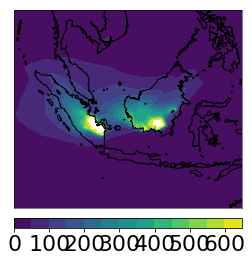

In [8]:
### Plot monthly surface data on a map ###

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm

file_path = 'C:\Users\eelk\Documents\PhD year 2\IPB_course/' #choose file path 

model_data = np.load(file_path+'2015_oct_PM25_month_surface_FINNpeat_plumerise.npy') #choose file 

#Plot#
m = Basemap(projection='merc',llcrnrlon=92.,llcrnrlat=-15.,urcrnrlon=127.,urcrnrlat=15.,resolution='i') #mercator map projection, ll = lower left, ur = upper right
m.drawcoastlines(linewidth=1)
m.drawmapboundary(linewidth=0.5)

ny = model_data.shape[0]; nx = model_data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = np.arange(0,700,50)
cs = m.contourf(x,y,model_data,clevs)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('')
# add title
plt.title('')


Text(0.5,1,u'')

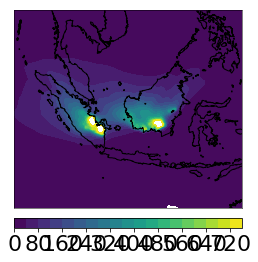

In [3]:
### Plot difference between data with and without fires on a map ###

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm

file_path = 'C:\Users\eelk\Documents\PhD year 2\IPB_course/' #choose file path 

model_data_fires = np.load(file_path+'2015_oct_PM25_month_surface_FINNpeat_plumerise.npy') #choose file 

model_data_no_fires = np.load(file_path+'2015_oct_PM25_month_surface_nofires.npy') #choose file 


fires_diff = model_data_fires-model_data_no_fires #get difference between datasets  

#Plot#
m = Basemap(projection='merc',llcrnrlon=92.,llcrnrlat=-15.,urcrnrlon=127.,urcrnrlat=15.,resolution='i') #mercator map projection, ll = lower left, ur = upper right
m.drawcoastlines(linewidth=1)
m.drawmapboundary(linewidth=0.5)

ny = model_data.shape[0]; nx = model_data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = np.arange(0,800, 40)
cs = m.contourf(x,y,fires_diff,clevs)
cbar = m.colorbar(cs,location='bottom',pad="5%") # add colorbar.
cbar.set_label('')
plt.title('') # add title


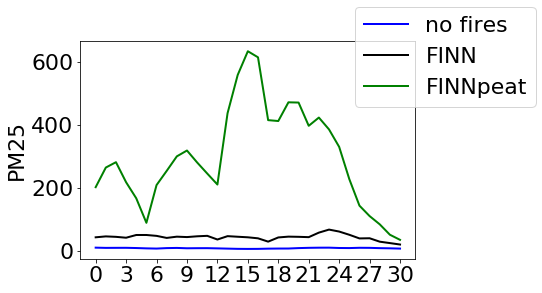

In [4]:
### PLot a timeline of daily surface data averaged over an area ###

import numpy as np
import matplotlib.pyplot as plt

file_path = 'C:\Users\eelk\Documents\PhD year 2\IPB_course/'

variable = 'PM25'

model_data1 = np.load(file_path+'2015_oct_'+variable+'_days_surface_nofires.npy') 
model_data2 = np.load(file_path+'2015_oct_'+variable+'_days_surface_FINN_plumerise.npy')
model_data3 = np.load(file_path+'2015_oct_'+variable+'_days_surface_FINNpeat_plumerise.npy')

#Choose area to average over#
area_lat_min = -4
area_lat_max = 1
area_lon_min = 108
area_lon_max = 116

#Average over area
model_data1_area = np.nanmean(model_data1[:, int((15+area_lat_min)*4) : int((15+area_lat_max)*4), int((area_lon_min-92)*4) : int((area_lon_max-92)*4)], axis = (1,2))
model_data2_area = np.nanmean(model_data2[:, int((15+area_lat_min)*4) : int((15+area_lat_max)*4), int((area_lon_min-92)*4) : int((area_lon_max-92)*4)], axis = (1,2))
model_data3_area = np.nanmean(model_data3[:, int((15+area_lat_min)*4) : int((15+area_lat_max)*4), int((area_lon_min-92)*4) : int((area_lon_max-92)*4)], axis = (1,2))


#Plot#
plt.figure()
plt.rcParams.update({'font.size': 22})
plt.plot(model_data1_area, 'b', linewidth = 2, label = 'no fires' )
plt.plot(model_data2_area, 'k', linewidth = 2, label = 'FINN' )
plt.plot(model_data3_area, 'g', linewidth = 2, label = 'FINNpeat' )

plt.ylabel(variable)
plt.xticks((np.arange(0,31,3)))
plt.legend(loc=(0.82,0.7))


